# Segmentación de clientes por historial crediticio con K-means
## Análisis Multivariado

### Ciencia de Datos
###### Edgar González Paz, Shanelly Abisay Leija Estrada, Velázquez Rocha Yaotzin


Importamos las librerías a utilizar.

In [1]:
library(rgl)
library(writexl)
library(rpart)
library(rpart.plot)
library(ggplot2)
library(Metrics)
#library(tidyverse)
library(gridExtra)

Warning message:
"package 'rgl' was built under R version 3.6.3"Warning message:
"package 'writexl' was built under R version 3.6.3"Warning message:
"package 'rpart' was built under R version 3.6.3"Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'Metrics' was built under R version 3.6.3"Warning message:
"package 'gridExtra' was built under R version 3.6.2"

El conjunto de datos recopila información acerca del historial crediticio de individuos que poseen un servicio de tarjeta de crédito, describiendo su comportamiento en los últimos 6 meses. 

Importamos el conjunto de datos, disponible en: https://www.kaggle.com/arjunbhasin2013/ccdata

In [2]:
setwd("C:/Users/HP/Downloads/")
credit_user <- read.csv("CC GENERAL.csv")
head(credit_user)

CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
C10001,40.90075,0.818182,95.40,0.00,95.40,0.000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.8021,139.5098,0.000000,12
C10002,3202.46742,0.909091,0.00,0.00,0.00,6442.945,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.0326,1072.3402,0.222222,12
C10003,2495.14886,1.000000,773.17,773.17,0.00,0.000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.0667,627.2848,0.000000,12
C10004,1666.67054,0.636364,1499.00,1499.00,0.00,205.788,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.0000,NA,0.000000,12
C10005,817.71434,1.000000,16.00,16.00,0.00,0.000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.3348,244.7912,0.000000,12
C10006,1809.82875,1.000000,1333.28,0.00,1333.28,0.000,0.666667,0.000000,0.583333,0.000000,0,8,1800,1400.0578,2407.2460,0.000000,12


In [3]:
m <- nrow(credit_user)
print(m)
print(colnames(credit_user))

[1] 8950
 [1] "CUST_ID"                          "BALANCE"                         
 [3] "BALANCE_FREQUENCY"                "PURCHASES"                       
 [5] "ONEOFF_PURCHASES"                 "INSTALLMENTS_PURCHASES"          
 [7] "CASH_ADVANCE"                     "PURCHASES_FREQUENCY"             
 [9] "ONEOFF_PURCHASES_FREQUENCY"       "PURCHASES_INSTALLMENTS_FREQUENCY"
[11] "CASH_ADVANCE_FREQUENCY"           "CASH_ADVANCE_TRX"                
[13] "PURCHASES_TRX"                    "CREDIT_LIMIT"                    
[15] "PAYMENTS"                         "MINIMUM_PAYMENTS"                
[17] "PRC_FULL_PAYMENT"                 "TENURE"                          


In [4]:
#Número de registros
m <- nrow(credit_user)
attach(credit_user)
colnames(credit_user)

[1] "CUST_ID"                          "BALANCE"                         
 [3] "BALANCE_FREQUENCY"                "PURCHASES"                       
 [5] "ONEOFF_PURCHASES"                 "INSTALLMENTS_PURCHASES"          
 [7] "CASH_ADVANCE"                     "PURCHASES_FREQUENCY"             
 [9] "ONEOFF_PURCHASES_FREQUENCY"       "PURCHASES_INSTALLMENTS_FREQUENCY"
[11] "CASH_ADVANCE_FREQUENCY"           "CASH_ADVANCE_TRX"                
[13] "PURCHASES_TRX"                    "CREDIT_LIMIT"                    
[15] "PAYMENTS"                         "MINIMUM_PAYMENTS"                
[17] "PRC_FULL_PAYMENT"                 "TENURE"

#### Pre-procesamiento de datos

In [5]:
#Establecemos como ID al CUST_ID
rownames(credit_user) <- credit_user$CUST_ID
col_eliminar <- c("CUST_ID")
credit_user <- credit_user[ , !(names(credit_user) %in% col_eliminar)]

#Tenemos faltantes, no hacemos inputación de datos y los borramos
credit_user <- na.omit(credit_user)
paste("Porcentaje de registros perdidos: ", (1 - nrow(credit_user)/m)*100, "%")

[1] "Porcentaje de registros perdidos:  3.50837988826815 %"

Nuestras variables están en diferentes escalas, utilizamos min-max scaler.

In [6]:
#Se define la función
min_max <- function(x)
{
  return((x- min(x)) /(max(x)-min(x)))
}
credit_user_norm <-as.data.frame(min_max(credit_user))

credit_user_norm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
C10001,0.0005353066,1.070832e-05,0.0012485897,0.0000000000,0.001248590,0.000000000,2.181328e-06,0.000000e+00,1.090657e-06,0.000000e+00,0.000000e+00,2.617588e-05,0.01308794,0.002641174,0.0018258960,0.000000e+00,0.0001570553
C10002,0.0419137073,1.189813e-05,0.0000000000,0.0000000000,0.000000000,0.084324896,0.000000e+00,0.000000e+00,0.000000e+00,3.271985e-06,5.235177e-05,0.000000e+00,0.09161559,0.053700252,0.0140347264,2.908429e-06,0.0001570553
C10003,0.0326563632,1.308794e-05,0.0101192040,0.0101192040,0.000000000,0.000000000,1.308794e-05,1.308794e-05,0.000000e+00,0.000000e+00,0.000000e+00,1.570553e-04,0.09815956,0.008141573,0.0082098668,0.000000e+00,0.0001570553
C10005,0.0107021977,1.308794e-05,0.0002094071,0.0002094071,0.000000000,0.000000000,1.090657e-06,1.090657e-06,0.000000e+00,0.000000e+00,0.000000e+00,1.308794e-05,0.01570553,0.008878006,0.0032038135,0.000000e+00,0.0001570553
C10006,0.0236869334,1.308794e-05,0.0174498911,0.0000000000,0.017449891,0.000000000,8.725299e-06,0.000000e+00,7.634628e-06,0.000000e+00,0.000000e+00,1.047035e-04,0.02355830,0.018323875,0.0315058961,0.000000e+00,0.0001570553
C10007,0.0082095529,1.308794e-05,0.0928067264,0.0837972490,0.009009477,0.000000000,1.308794e-05,1.308794e-05,1.308794e-05,0.000000e+00,0.000000e+00,8.376283e-04,0.17668721,0.083164896,0.0025922749,1.308794e-05,0.0001570553
C10008,0.0238678610,1.308794e-05,0.0057089602,0.0000000000,0.005708960,0.000000000,1.308794e-05,0.000000e+00,1.308794e-05,0.000000e+00,0.000000e+00,1.570553e-04,0.03010227,0.008887564,0.0069632299,0.000000e+00,0.0001570553
C10009,0.0132832986,1.308794e-05,0.0112751310,0.0086575426,0.002617588,0.000000000,4.362643e-06,1.090657e-06,3.271985e-06,0.000000e+00,0.000000e+00,6.543971e-05,0.09161559,0.009008150,0.0040829590,0.000000e+00,0.0001570553
C10010,0.0019923247,7.138883e-06,0.0167735063,0.0167735063,0.000000000,0.000000000,2.181328e-06,2.181328e-06,0.000000e+00,0.000000e+00,0.000000e+00,3.926383e-05,0.14396736,0.015244450,0.0013127502,0.000000e+00,0.0001570553
C10011,0.0169243440,1.308794e-05,0.0120424770,0.0000000000,0.012042477,0.000000000,1.308794e-05,0.000000e+00,1.308794e-05,0.000000e+00,0.000000e+00,1.570553e-04,0.01570553,0.014178181,0.0284361420,0.000000e+00,0.0001570553


#### Análisis de Componentes Principales
Al lidiar con la "maldición de la dimensionalidad", las técnicas de reducción de dimensionalidad son útilies para poder obtener nuevas variables que son construidas con las de nuestro conjunto de datos.

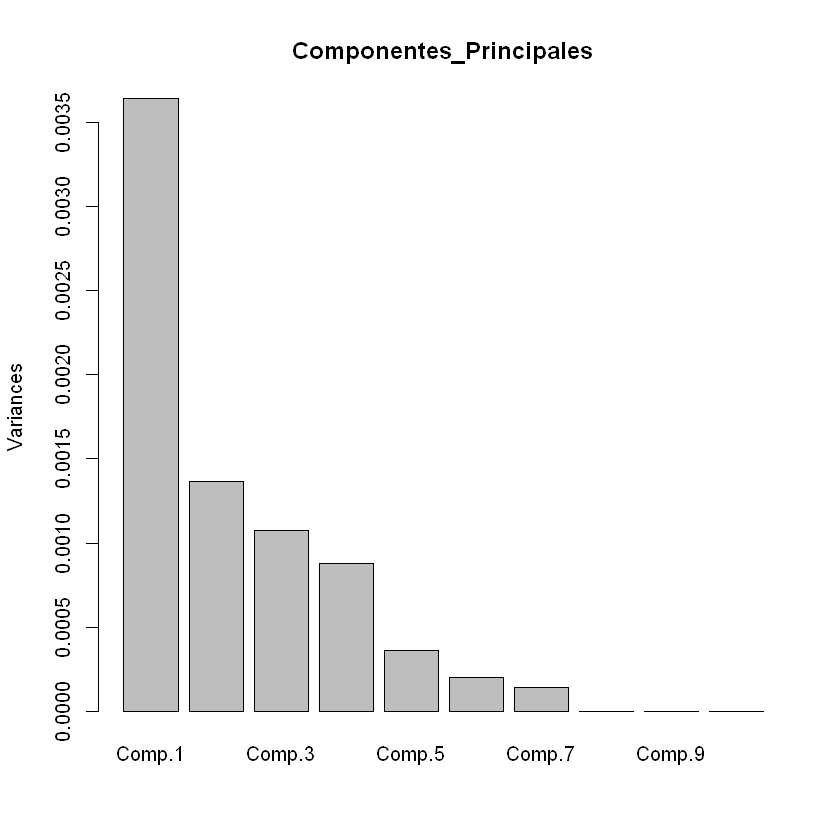

In [7]:
Componentes_Principales <- princomp(credit_user_norm)
screeplot(Componentes_Principales)

In [8]:
credit_user_norm.cov <- cov(credit_user_norm)
credit_user_norm.eigen <- eigen(credit_user_norm.cov)
str(credit_user_norm.eigen)


#Esras serán las cargas de nuestros componentes principales
(phi <- credit_user_norm.eigen$vectors[,1:2])
phi <- -phi
row.names(phi) <- colnames(credit_user_norm)
colnames(phi) <- c("PC1", "PC2")
phi


# Calculamos los scores de los componentes principales
PC1 <- as.matrix(credit_user_norm) %*% phi[,1]
PC2 <- as.matrix(credit_user_norm) %*% phi[,2]

# Creamos un dataframe con ellos
PC <- data.frame(State = row.names(credit_user_norm), PC1, PC2)
head(PC)


List of 2
 $ values : num [1:17] 0.003641 0.001366 0.001075 0.000879 0.000362 ...
 $ vectors: num [1:17, 1:17] -2.91e-01 -6.55e-06 -2.95e-01 -2.13e-01 -8.25e-02 ...
 - attr(*, "class")= chr "eigen"


-2.909152e-01,3.137832e-01
-6.548654e-06,4.910703e-06
-2.952570e-01,-5.079585e-01
-2.127650e-01,-3.862139e-01
-8.248528e-02,-1.217855e-01
-2.169358e-01,2.195197e-01
-1.273874e-05,-3.799774e-05
-2.258750e-05,-2.955054e-05
-8.425203e-06,-3.057968e-05
-1.010776e-05,2.059514e-05
-4.045452e-04,5.465460e-04


,PC1,PC2
BALANCE,2.909152e-01,-3.137832e-01
BALANCE_FREQUENCY,6.548654e-06,-4.910703e-06
PURCHASES,2.952570e-01,5.079585e-01
ONEOFF_PURCHASES,2.127650e-01,3.862139e-01
INSTALLMENTS_PURCHASES,8.248528e-02,1.217855e-01
CASH_ADVANCE,2.169358e-01,-2.195197e-01
PURCHASES_FREQUENCY,1.273874e-05,3.799774e-05
ONEOFF_PURCHASES_FREQUENCY,2.258750e-05,2.955054e-05
PURCHASES_INSTALLMENTS_FREQUENCY,8.425203e-06,3.057968e-05
CASH_ADVANCE_FREQUENCY,1.010776e-05,-2.059514e-05


,State,PC1,PC2
C10001,C10001,0.01116023,-0.004183164
C10002,C10002,0.12157118,-0.049682185
C10003,C10003,0.08719911,-0.041298010
C10005,C10005,0.01878266,-0.006577220
C10006,C10006,0.04289268,-0.004976847
C10007,C10007,0.21075138,0.039296470


[1] 0.47 0.18 0.14 0.11 0.05 0.03 0.02 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
[16] 0.00 0.00

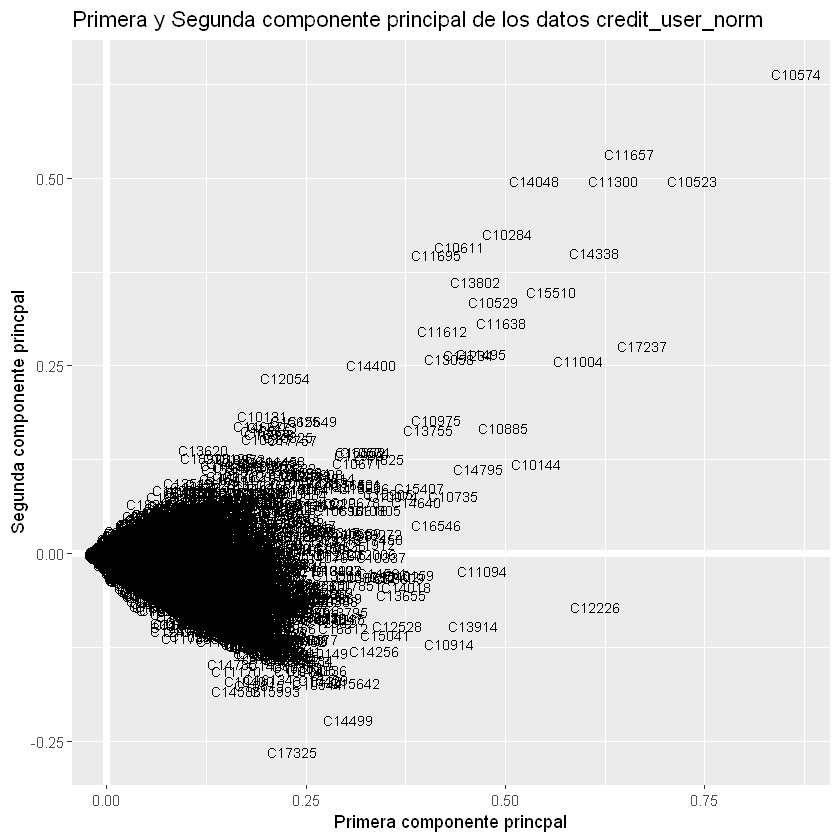

In [9]:
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera componente princpal") + 
  ylab("Segunda componente princpal") + 
  ggtitle("Primera y Segunda componente principal de los datos credit_user_norm")

#El aporte de cada componente principal(PVE) es:
PVE <- credit_user_norm.eigen$values / sum(credit_user_norm.eigen$values)
round(PVE, 2)


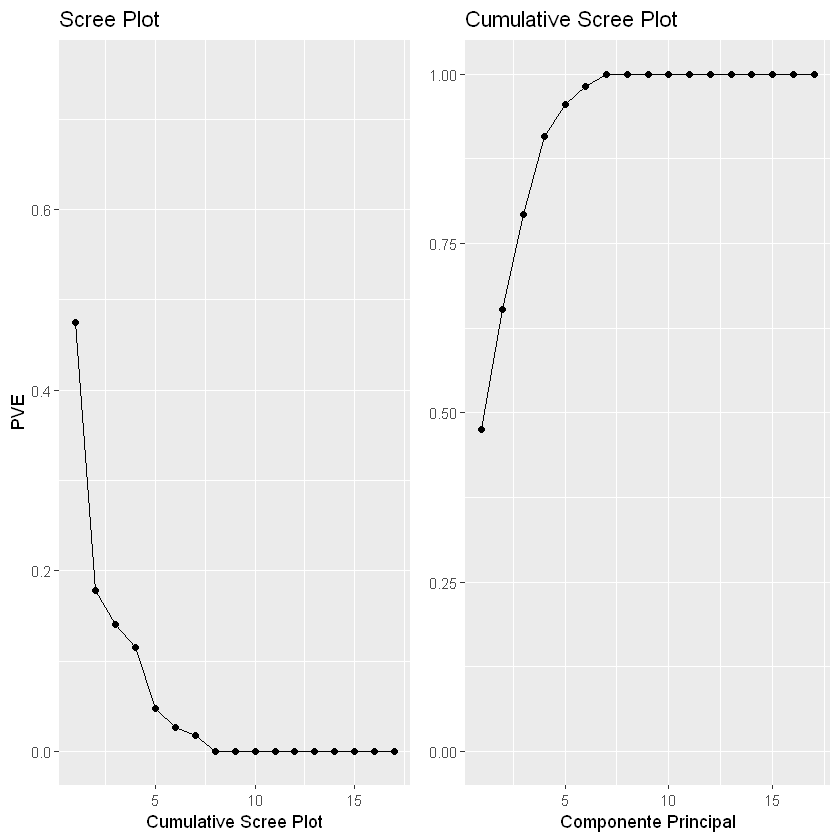

In [10]:
PVEplot <- qplot(c(1:17), PVE) + 
  geom_line() + 
  xlab("Cumulative Scree Plot") + 
  ylab("PVE") +
  ggtitle("Scree Plot") +
  ylim(0, .75)
cumPVE <- qplot(c(1:17), cumsum(PVE)) + 
  geom_line() + 
  xlab("Componente Principal") + 
  ylab(NULL) + 
  ggtitle("Cumulative Scree Plot") +
  ylim(0,1)
grid.arrange(PVEplot, cumPVE, ncol = 2)

In [11]:
pca_result <- prcomp(credit_user_norm, scale = TRUE)
names(pca_result)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [12]:
biplot(pca_result, scale = 0)



ERROR: Error in prcomp(carros, scale = TRUE): objeto 'carros' no encontrado


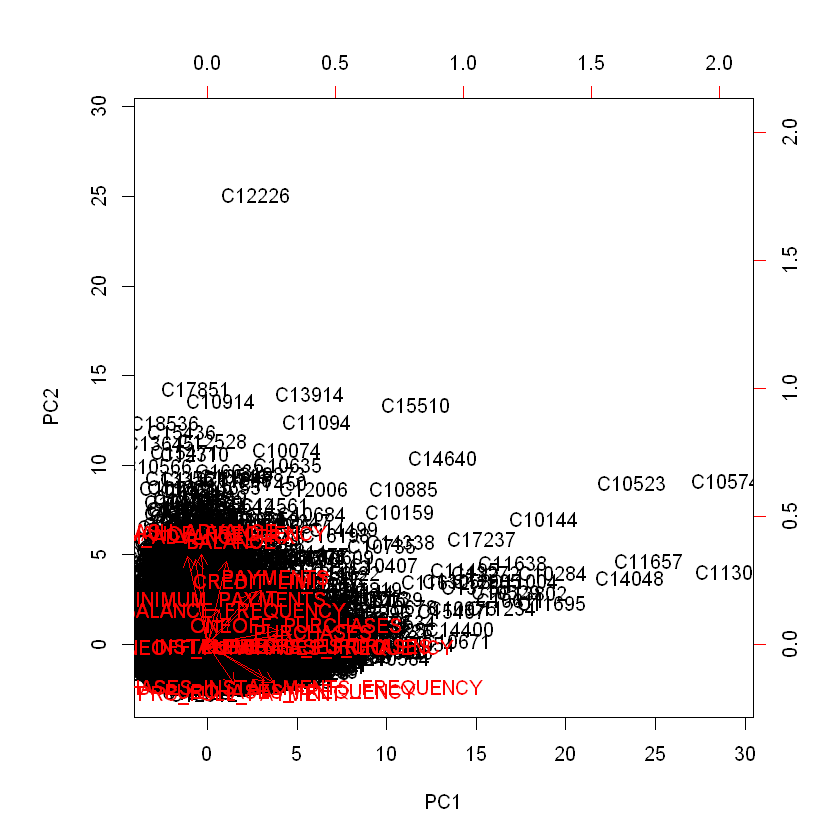

In [13]:
pca_result <- prcomp(credit_user_norm, scale = TRUE)
biplot(pca_result, scale = 0)

Tomando en cuenta el valor de varianza explicada, tomando 3 componentes principales podemos obtener una "buena" representación de la estructura de los datos con menos variables.

In [14]:
credit_user_pc <- as.data.frame(Componentes_Principales$scores[,1:3])
plot3d(x=credit_user_pc$Comp.1, y=credit_user_pc$Comp.2, z=credit_user_pc$Comp.3)

![alt text](ACP.png "ACP")

#### Clúster: K-medias

Para el número de clústers, vamos a probar con distintas k (1 a 5) y tomaremos como criterio de elección el número k de clúster tal que la suma de la varianza dentro de los grupos sea muy pequeña pues obtendríamos clústers compactos. Además, establemos una semilla para fines de reproducción.

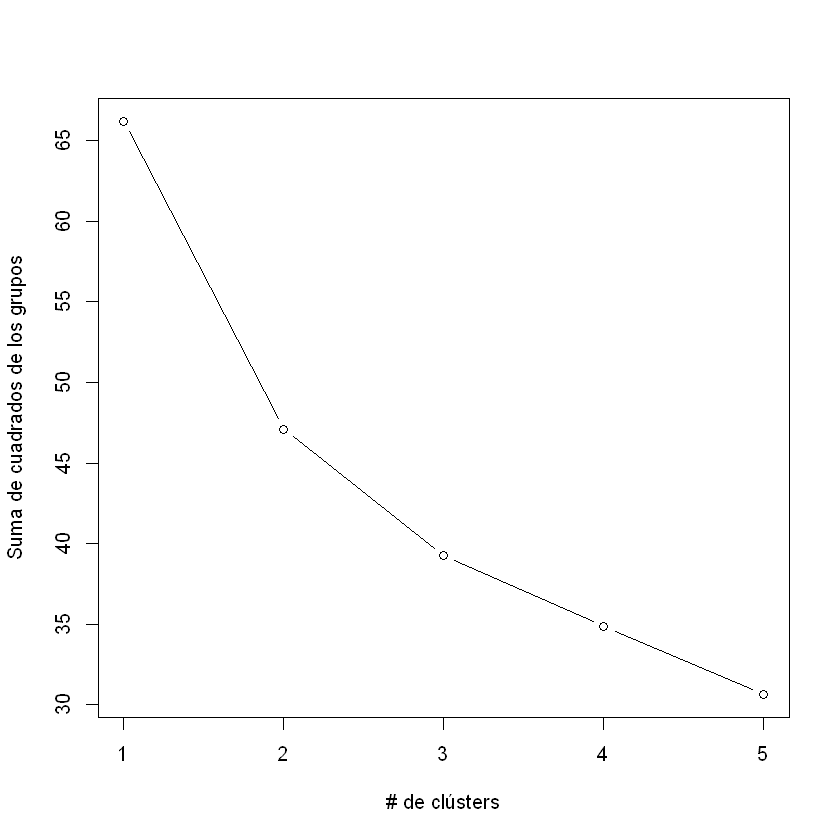

In [15]:
set.seed(23)
n <- 5
s_v_g <- rep(0, n)
for (i in 1:n){
  s_v_g[i] <- sum(kmeans(credit_user_norm,centers=i)$withinss)
} 
plot(1:n, s_v_g, type="b", xlab="# de clústers",ylab="Suma de cuadrados de los grupos")

Aplicamos k-means con k=3 al conjunto de datos "normalizado".

In [16]:
k <- kmeans(credit_user_norm, 3)
plot3d(x=credit_user_pc$Comp.1, y=credit_user_pc$Comp.2, z=credit_user_pc$Comp.3, col=k$clust)

![alt text](ACP-CL.png "ACP")
Asignamos la etiqueta de clase obtenida al conjunto de datos original.

In [18]:
credit_user$cluster <- k$clust
credit_user

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
C10001,40.90075,0.818182,95.40,0.00,95.40,0.0000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.8021,139.50979,0.000000,12,2
C10002,3202.46742,0.909091,0.00,0.00,0.00,6442.9455,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.0326,1072.34022,0.222222,12,1
C10003,2495.14886,1.000000,773.17,773.17,0.00,0.0000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.0667,627.28479,0.000000,12,2
C10005,817.71434,1.000000,16.00,16.00,0.00,0.0000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.3348,244.79124,0.000000,12,2
C10006,1809.82875,1.000000,1333.28,0.00,1333.28,0.0000,0.666667,0.000000,0.583333,0.000000,0,8,1800,1400.0578,2407.24604,0.000000,12,2
C10007,627.26081,1.000000,7091.01,6402.63,688.38,0.0000,1.000000,1.000000,1.000000,0.000000,0,64,13500,6354.3143,198.06589,1.000000,12,1
C10008,1823.65274,1.000000,436.20,0.00,436.20,0.0000,1.000000,0.000000,1.000000,0.000000,0,12,2300,679.0651,532.03399,0.000000,12,2
C10009,1014.92647,1.000000,861.49,661.49,200.00,0.0000,0.333333,0.083333,0.250000,0.000000,0,5,7000,688.2786,311.96341,0.000000,12,2
C10010,152.22598,0.545455,1281.60,1281.60,0.00,0.0000,0.166667,0.166667,0.000000,0.000000,0,3,11000,1164.7706,100.30226,0.000000,12,1
C10011,1293.12494,1.000000,920.12,0.00,920.12,0.0000,1.000000,0.000000,1.000000,0.000000,0,12,1200,1083.3010,2172.69776,0.000000,12,2


#### Evaluación de nuestro modelo

Se propone evaluar la clasificación del conjunto de datos por medio de un modelo supervisado: árbol de decisión.

Divido el conjunto de datos en un conjunto de entrenamiento y otro de validación.

In [20]:
#Obtenemos el 75% de los registros
porcentaje_entrenamiento <- floor(nrow(credit_user)*3/4) 
#Reordenamos aleatoriamente
credit_user_muestra <- credit_user[sample(nrow(credit_user)),] 
#Se obtiene el conjunto de entrenamiento
credit_user_entrenamiento <- credit_user[1:porcentaje_entrenamiento,] 
#El conjunto de validación
credit_user_validacion <- credit_user[(porcentaje_entrenamiento+1):nrow(credit_user),] 

Ajusto un árbol de decisión sencillo a los datos de entrenamiento.

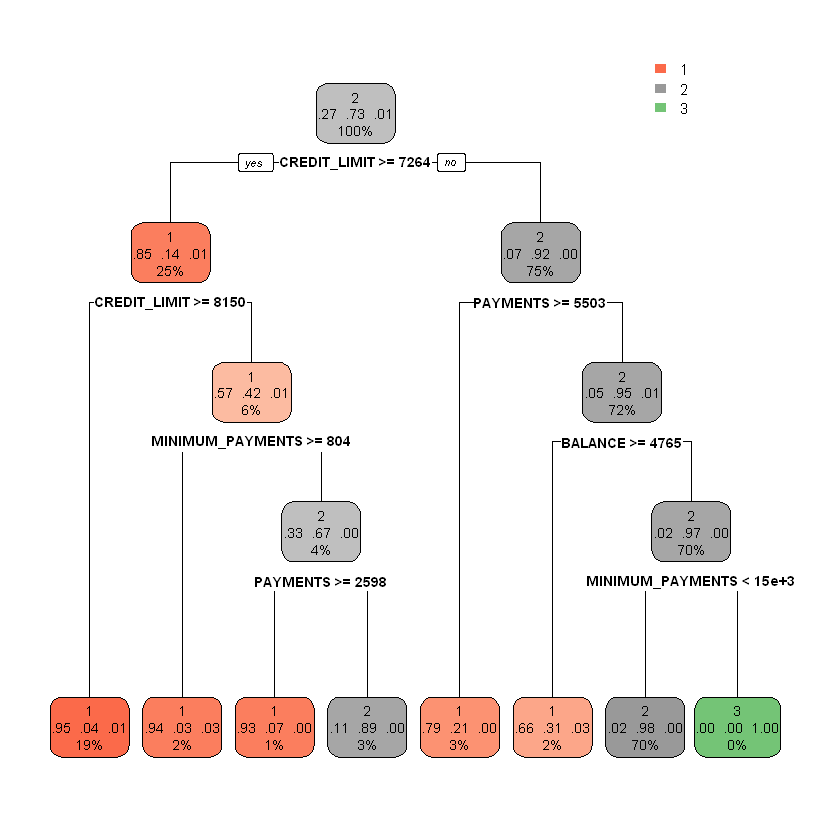

In [21]:
fit <- rpart(cluster~., data = credit_user_entrenamiento, method = 'class')
rpart.plot(fit)

Hago la predicción con el conjunto de validación (sin su etiqueta de clase).

In [22]:
Etiqueta_de_clase_prediccion <-predict(fit, subset(credit_user_validacion, select = -c(cluster)), type = 'class')

In [23]:
matriz_confusion <- table(credit_user_validacion$cluster, Etiqueta_de_clase_prediccion)
matriz_confusion <- as.data.frame(matriz_confusion)
colnames(matriz_confusion)[1] <- "Etiqueta_de_clase_verdadera"

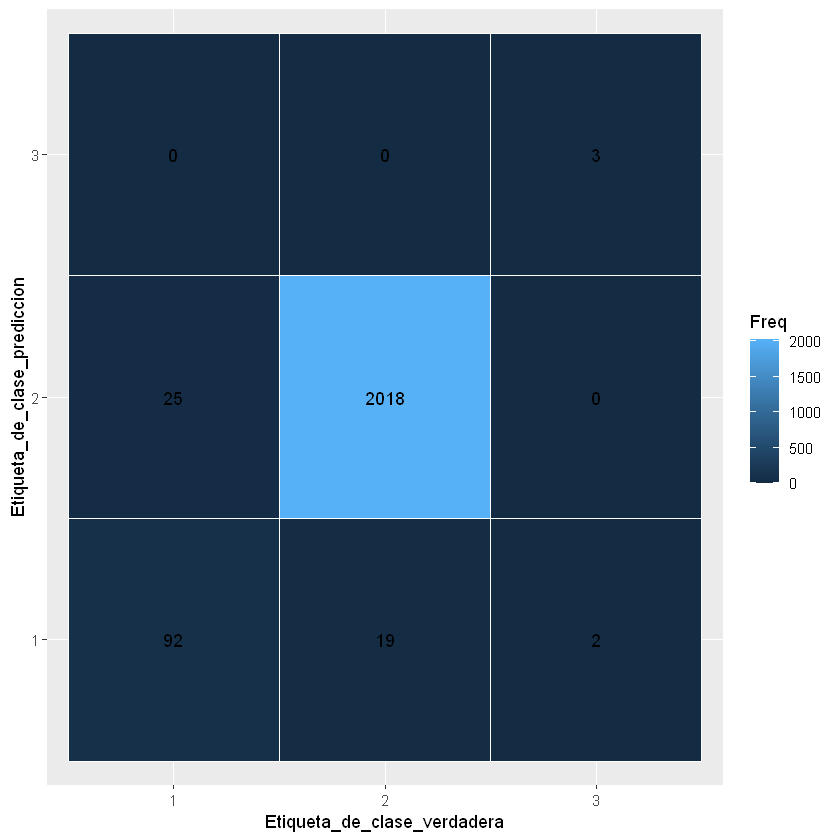

In [24]:
ggplot(matriz_confusion, mapping = aes(x = Etiqueta_de_clase_verdadera, y = Etiqueta_de_clase_prediccion)) + 
geom_tile(aes(fill = Freq), colour = "white") + geom_text(aes(label = Freq))

#### Interpretación
Por último, para poder dar una breve descripción de nuestros resultados tomamos algunas variables tales como: 

•	Compras: Monto de compras hechos de la cuenta.

•	Frecuencia de compra: es un score entre 0 y 1, donde 0 es igual a no muy frecuente y 1 es frecuente.

•	Límite de crédito: por cada usuario.

In [25]:
resumen = aggregate(x = credit_user[c("PURCHASES", "PURCHASES_FREQUENCY", "CREDIT_LIMIT", "PAYMENTS")], 
                    by = list(Cluster = credit_user$clust), FUN=mean)
write_xlsx(resumen, "Resumen.xlsx")
resumen

Cluster,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS
1,2402.9595,0.5641471,9876.836,4352.220
2,642.1461,0.4770914,3044.864,1073.288
3,1780.2668,0.5244318,5316.250,2640.723


Podemos interpretar los clústeres de la siguiente manera:

Clúster 1: Aquellos usuarios “top” que poseen un historial crediticio muy bueno, que consume con mucha frecuencia y además  poseen un límite de crédito alto.

Clúster 2:  Usuarios que no consumen tanto y con línea de crédito considerable.

Clúster 3:  Usuarios con monto de compra promedio, así como frecuencia de compra promedio, sin embargo, posee un buen limite crediticio.